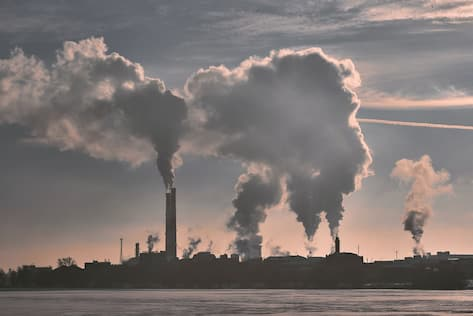

Photo by Maxim Tolchinskiy on Unsplash
  

When factoring heat generation required for the manufacturing and transportation of products, _Greenhouse gas emissions attributable to products, from food to sneakers to appliances, make up more than 75% of global emissions._ -[The Carbon Catalogue](https://www.nature.com/articles/s41597-022-01178-9)

Our data, which is publicly available on [nature.com](https://www.nature.com/articles/s41597-022-01178-9), contains product carbon footprints (PCFs) for various companies. PCFs are the greenhouse gas emissions attributable to a given product, measured in CO<sub>2</sub> (carbon dioxide equivalent).

This data is stored in a PostgreSQL database containing one table, `product_emissions`, which looks at PCFs by product as well as the stage of production that these emissions occurred. Here's a snapshot of what `product_emissions` contains in each column:

### `product_emissions`

| field                              | data type |
|------------------------------------|-----------|
| `id`                                 | `VARCHAR`   |
| `year`                               | `INT`       |
| `product_name`                       | `VARCHAR`   |
| `company`                            | `VARCHAR`   |
| `country`                            | `VARCHAR`   |
| `industry_group`                     | `VARCHAR`   |
| `weight_kg`                          | `NUMERIC`   |
| `carbon_footprint_pcf`               | `NUMERIC`   |
| `upstream_percent_total_pcf`         | `VARCHAR`   |
| `operations_percent_total_pcf`       | `VARCHAR`   |
| `downstream_percent_total_pcf`       | `VARCHAR`   |

You'll use this data to examine the carbon footprint of each industry in the dataset!

Find the number of unique companies and their total carbon footprint PCF for each industry group, filtering for the most recent year in the database. The query should return three columns: `industry_group`, `num_companies`, and `total_industry_footprint`, with the last column being rounded to one decimal place. The results should be sorted by `total_industry_footprint` from highest to lowest values.

In [16]:
SELECT DISTINCT industry_group, COUNT(DISTINCT company) AS num_companies, ROUND(SUM(carbon_footprint_pcf),1) AS total_industry_footprint
	FROM product_emissions
	WHERE year IN (SELECT MAX(year) FROM product_emissions)
	GROUP BY industry_group
	ORDER BY total_industry_footprint DESC

,industry_group,num_companies,total_industry_footprint
0,Materials,3,107129.0
1,Capital Goods,2,94942.7
2,Technology Hardware & Equipment,4,21865.1
3,"Food, Beverage & Tobacco",1,3161.5
4,Commercial & Professional Services,1,740.6
5,Software & Services,1,690.0
